<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Janmejay, Vaishnavi

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [1]:
# User input for asset/company
asset_name = input("Enter the company name (e.g.TCS, Rakuten, Netflix): ").upper()
print(f"\nData analysis will be performed for: {asset_name}")


Enter the company name (e.g.TCS, Rakuten, Netflix): microsoft

Data analysis will be performed for: MICROSOFT


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [2]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.5 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=9e9b5d2ec628afe84df9fcf9bb5767c95019a54557f0847fda5d4ec52c744b19
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=32cc969e057b35462e2715ec8868c55de3fd08845e8dea55e089aa62ffaa647f
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built wikipedia sgmllib3k


## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [3]:
def get_company_summary(company_name):
    try:
        # Search Wikipedia for the company
        search_results = wikipedia.search(company_name)

        if not search_results:
            return f"No Wikipedia pages found for {company_name}"

        # Keywords to detect company pages
        company_keywords = ["company", "corporation", "limited", "ltd", "group", "services", "bank", "motor", "industries", "technology"]

        # Try to find the best company-related page
        best_match = None
        for result in search_results:
            lower = result.lower()
            if any(keyword in lower for keyword in company_keywords):
                best_match = result
                break

        # If no match found, pick the first result
        if not best_match:
            best_match = search_results[0]

        # Fetch summary
        summary = wikipedia.summary(best_match, sentences=10)
        return summary

    except wikipedia.exceptions.DisambiguationError as e:
        # Pick first meaningful option
        option = e.options[0]
        summary = wikipedia.summary(option, sentences=10)
        return summary

    except Exception as e:
        return f"Error fetching summary: {e}"

# Usage:
print(get_company_summary(asset_name))


Microsoft Corporation is an American multinational technology conglomerate headquartered in Redmond, Washington. Founded in 1975, the company became influential in the rise of personal computers through software like Windows, and has since expanded to Internet services, cloud computing, artificial intelligence, video gaming, and other fields. Often described as a Big Tech company, Microsoft is the largest software maker, one of the most valuable public companies, and one of the most valuable brands globally.
Microsoft was founded by Bill Gates and Paul Allen to market BASIC interpreters for the Altair 8800. It rose to dominate the personal computer operating system market with MS-DOS in the mid-1980s, followed by Windows. During the 41 years from 1980 to 2021 Microsoft released 9 versions of MS-DOS with a median frequency of 2 years, and 13 versions of Windows with a median frequency of 3 years. The company's 1986 initial public offering (IPO) and subsequent rise in its share price cre

## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [4]:
tickers = {
    # Existing
    "NETFLIX": "NFLX",
    "APPLE": "AAPL",
    "TESLA": "TSLA",
    "GOOGLE": "GOOGL",
    "MICROSOFT": "MSFT",
    "TCS": "TCS.NS",
    "INFOSYS": "INFY.NS",
    "RAKUTEN": "RKUNY",
    "BITCOIN": "BTC-USD",

    # 🔥 Popular US Tech
    "AMAZON": "AMZN",
    "META": "META",         # Facebook
    "NVIDIA": "NVDA",
    "AMD": "AMD",
    "INTEL": "INTC",

    # 🏦 Finance
    "JP MORGAN": "JPM",
    "GOLDMAN SACHS": "GS",
    "MASTERCARD": "MA",
    "VISA": "V",

    # 🇮🇳 Common Indian Stocks
    "RELIANCE": "RELIANCE.NS",
    "HDFC": "HDFCBANK.NS",
    "ICICI": "ICICIBANK.NS",
    "WIPRO": "WIPRO.NS",
    "HCL": "HCLTECH.NS",
    "ADANIPORTS": "ADANIPORTS.NS",
    "ADANIENT": "ADANIENT.NS",

    # 🚗 Auto
    "TATA MOTORS": "TATAMOTORS.NS",
    "MARUTI": "MARUTI.NS",
    "TESLA": "TSLA",       # already above but kept for auto category

    # 🔴 Other Big Names
    "COCA COLA": "KO",
    "PEPSICO": "PEP",
    "WALMART": "WMT",
    "NETFLIX": "NFLX",     # already included

    # 💰 Other popular crypto
    "ETHEREUM": "ETH-USD",
    "DOGECOIN": "DOGE-USD",
    "SOLANA": "SOL-USD"
}

try:
    asset = tickers.get(asset_name.upper(), asset_name.upper())
    ticker = yf.Ticker(asset)
    market_data = ticker.history(period="1mo", interval="1d")

    if market_data.empty:
        raise ValueError("No data returned. Check ticker symbol.")

    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {asset}:")
    display(market_data.head())

except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")



 Market Data Sample for MSFT:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-10-08 00:00:00-04:00,523.280029,526.950012,523.090027,524.849976,13363400,0.0,0.0
1,2025-10-09 00:00:00-04:00,522.340027,524.330017,517.400024,522.400024,18343600,0.0,0.0
2,2025-10-10 00:00:00-04:00,519.640015,523.580017,509.630005,510.959991,24133800,0.0,0.0
3,2025-10-13 00:00:00-04:00,516.409973,516.409973,511.679993,514.049988,14284200,0.0,0.0
4,2025-10-14 00:00:00-04:00,510.230011,515.280029,506.000000,513.570007,14684300,0.0,0.0


In [5]:


from IPython.display import display, HTML
import feedparser

# Construct RSS feed URL for Google News
news_url = f"https://news.google.com/rss/search?q={asset_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(news_url)

print(f"\n Recent News Headlines for {asset_name}:")

# Iterate through the first 10 news items (or fewer if less than 10)
for entry in feed.entries[:10]:
    display(HTML(f'{entry.title}'))
    # Display summary and source if available
    summary = getattr(entry, 'summary', 'N/A')
    source = getattr(entry, 'source', 'N/A')
    print(f"Summary: {summary}\nSource: {source.get('title', 'N/A')}\n")


 Recent News Headlines for MICROSOFT:


Summary: <a href="https://news.google.com/rss/articles/CBMiugFBVV95cUxOYnhUZk1NUTUzQkVDU0drcHJMOWZWcFBPZERqVnAwQXFxODJORTRRd2JuTE9VeTlKclJPTklJR0o3X3ZITEg5endtTVJDS2MtNHdZbndrQ2NMeVVVeXlpWnI4TVVPYktXREU2LU1pN3NwMkItaWZNMGFiY282c0pKdVhYQ3NPb1RZa2tSbjFVSVFYMlJHYXo0WlozVmxEV3NWMXpyTGt3NEcxNXg2UWQ4aTEtdmUweU4wN2c?oc=5" target="_blank">Free Gift Cards—Microsoft Confirms New Offer For Windows Users</a>&nbsp;&nbsp;<font color="#6f6f6f">Forbes</font>
Source: Forbes



Summary: <a href="https://news.google.com/rss/articles/CBMiqwJBVV95cUxOSmZVeFFyeHE1ckp2OG9BU1BUXzJSQi1fMUdZRzBtemlVUWlMS1VUYmV6cmxCb1dXRzV3bkltQUZBSlROOEkwZE9VR0FwUXBuQU02ODZsc0hZUjVaYkpGam5YSE1sVUVleS0tVng1U2xxVFBmODdpMnhoT3haV09IVzEzY1VCWjk2cnFvVzNWeVZ0Y0xqbGpldG9qR3g4QVhkSVRVNG9UMFBRdzF5MWpTb2JzTElTM2k1YXF0QXFaQTBtaWh1TFZ6d2pOYXVXLU9McDdCRkJSN3ByQVdBRlFZYkoxQ1RhbDJjdzRaaG9wQl9YSXJMZnN6bndQMUxORzRiSTZWTXZOTWtkeGVhZXVkQzFPR25RLXN0SkxzdkJ5MXRES2p4WGpRakdHcw?oc=5" target="_blank">Microsoft announces first test build for Windows 11 26H1, aimed at 'specific silicon' — Rumor mill suggests first "H1" release in Windows 11's history might be reserved for upcoming Arm PCs</a>&nbsp;&nbsp;<font color="#6f6f6f">Tom's Hardware</font>
Source: Tom's Hardware



Summary: <a href="https://news.google.com/rss/articles/CBMi7wFBVV95cUxOTERSWGlRMTJnaHVZOEpnbVlJUjBpUE5CUkFVamxjZFlOWVNVTEIxWUVkaTJZc3NIaDdBRkp1V1RaNUNYTEJ6bE9WMW1halBMQlZReVBKcS1uRUxLRkVqOFdMVW5CWjZ4bFJHMi0xdTlKd0pkRGJKSUVhZjlnSzVSSHl4SjhVQWF3RVR3U0Rncm9vTkdsa3RyRVg0ekJUWU9GYmh0RjNmNjBBQ0p0R0RYRnFUWjh3a1prTnpmR2Z6M0UzeGFWcHRWZTQ0d2VObmhVNUVaQUFnQm5fTF9YMWxRQlVrQUV1a2I3SVkySWVxMA?oc=5" target="_blank">An ex-Microsoft Engineer has explained how he would fix Windows, and I think I might actually be on board</a>&nbsp;&nbsp;<font color="#6f6f6f">PC Gamer</font>
Source: PC Gamer



Summary: <a href="https://news.google.com/rss/articles/CBMie0FVX3lxTFByZWp3Ty1yOTlFT2lwS0pTY2ZsdnZKa0RIXzZjTkZCVWdaeUtCYjN3dmlPSjNiWDVDNVQ5cHlJTElhUm90VV8xdFZGNktGaUliTWFQVUZES1VtMVNQWDgzRzluUmctYmVtVlpiU0owalpOcGR0cER2VnlWTQ?oc=5" target="_blank">Microsoft's lack of quality control is out of control</a>&nbsp;&nbsp;<font color="#6f6f6f">theregister.com</font>
Source: theregister.com



Summary: <a href="https://news.google.com/rss/articles/CBMimwFBVV95cUxOQ01NalU2bFY0RXBIWVVSd0FneEV3cThiT05pRC1lNlg3VDBHQ09maXZOYXVpOFVsM2hZazRnUktFVE56ak1RY1p1RkJiR3NyMEt0RW0ybTMwMmFMZ0NVQmkyMjhBYzhkUTRjZGx5aXM4R3FkTWlvN2JCT1FnLW8xdVhXWFMxM0syNFdndlJfZVlSVlVRUE9nc01RWQ?oc=5" target="_blank">Microsoft: When You Can Own The Best, Why Look Elsewhere?</a>&nbsp;&nbsp;<font color="#6f6f6f">Seeking Alpha</font>
Source: Seeking Alpha



Summary: <a href="https://news.google.com/rss/articles/CBMiigFBVV95cUxNbnk4UEtlYXNQZ1lBTGYtbXI0WU9XNGdINXlVellTSjY1Y0p6VTdIOTE5WGNCTDlwRUZmWF9jZFBLZnc3ckdVS0Vuc2pKczNuN1BmODBqRVpuZF9vdjBnTTlVazlURzVTX1FRVjY1LUNnVG9TdVZyMU95cFRTQjhkQ1RZVmUwclJXUWc?oc=5" target="_blank">Microsoft Eyes Longest Selloff Since 2011 as AI Trade Weakens</a>&nbsp;&nbsp;<font color="#6f6f6f">Yahoo Finance</font>
Source: Yahoo Finance



Summary: <a href="https://news.google.com/rss/articles/CBMixgFBVV95cUxPTXZ1THlKcGlHdUJoMTQwTXhMdlQ3WDZaSXNyWVFIRkp1cnpVeHNocHgyX3dyUzlRVGhlZjktYThNaDZRSnZuN2lyTXFuQkJxRWJaWWhvM1FxQXpYS1dxallUUUJURGZtZldGcDFJZW9uQWdaLUNNRHF4ckpDRDZWVElydFZKY0hZY3NuVXdRdmdsLXhpODRCekh0UnJmYlBramZBcGk1U250aWU0QjRKYzRQMjg1Z2lzM2UtY29XVXo3REVHTXfSAcsBQVVfeXFMT3JMcFlZTHVIRUR2STVBWE1GdkRYdTdNSDktVk5OTWhUX2d6M3c0Nm4wNmp4aGRSa3JsVUU2Z1MzZHd0Z0d4bkVxNEkxM0RkQ3h1ZFVGcWRCcEgtd1hWU1dZQVdrOENsRlFvZWhBYVh3SnBhb2FieWItOHVkSFBnT2JfTnYyaVhLZmtPSXNlV1J6U202cU1CZUk5Tmx2OENtM0pIaFRJd0ZnRUxTeDdwNEJCUVFjUTYxcDZpM0hYQm5MSlpMdmV3cGdlMWc?oc=5" target="_blank">Meta, Google and Microsoft are planning to discontinue release of… | Technology News</a>&nbsp;&nbsp;<font color="#6f6f6f">Hindustan Times</font>
Source: Hindustan Times



Summary: <a href="https://news.google.com/rss/articles/CBMid0FVX3lxTE9NX1pxcmZOaUwwVDlUWmhLZnRpN0FLdllQMVBEMlBTU1RYMWw4UFFIVjlWZm9VMGxqNGs1M05jWWhGM3BDWUlnQ0wtdS0xZzNHM0hVdWJ2VWlvR0RSM21WaGFsYkthbzJEdGlGNEVMWC1hTmlRanhZ?oc=5" target="_blank">Microsoft teases agents that become ‘independent users within the workforce’</a>&nbsp;&nbsp;<font color="#6f6f6f">theregister.com</font>
Source: theregister.com



Summary: <a href="https://news.google.com/rss/articles/CBMigwFBVV95cUxPM0ZiZThPbDEzVmpfYlhqQlhYNlh2cjNPeVo5cXUwRUx6NjlRd1ZOclRvMVZiOTFpSkJoLUpSVkNha2FOM3VIV1Btbi1tX0xnamdjVGJ3T1ByNnlKWlBmX1VqbGtGN3FKUHEtaFY0bEVTR2JNem9BdFNCdUE2clREalJMbw?oc=5" target="_blank">Microsoft Uncovers 'Whisper Leak' Attack That Identifies AI Chat Topics in Encrypted Traffic</a>&nbsp;&nbsp;<font color="#6f6f6f">The Hacker News</font>
Source: The Hacker News



Summary: <a href="https://news.google.com/rss/articles/CBMi5AFBVV95cUxPR0FyUGR3RjZEUVltWmZ4WHZQUFNMY2FUOXB0Z2hjNmdVV1d0RVFqQ1ZCVjRTVllmYXVHcGU0WVdYQWp3dzlJc0VYYTRodXVnY2F6RXl1U1lhY3kxTUIxSWVqMjRsLU5waXd6WmZsWlhYQW90VEZGX1J3eEh5QjEyMUtTS1BJT1p2TEFDd25FcDc0Q19ib2JhZXlPdXR6TWxycHVYblBfNWNPS1YxQnVPZzJxc2g0UVlqRS1KQ2VXSi1lc2M3MHVIMmpUMERoX0I0MmYzUDBmZ0RRUGEtLXExMGd5bGY?oc=5" target="_blank">Microsoft Flight Simulator isn't just for nerdy dads anymore: Boeing will start using its tech to train actual pilots</a>&nbsp;&nbsp;<font color="#6f6f6f">PC Gamer</font>
Source: PC Gamer



## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [6]:
# Construct RSS feed URL for Google News
company_name=asset_name.replace(" ", "");
rss_url = f"https://news.google.com/rss/search?q={company_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {asset_name}:")
display(news_df)


 Top 10 News Headlines for MICROSOFT:


,Title,Link,Published
0,Free Gift Cards—Microsoft Confirms New Offer F...,https://news.google.com/rss/articles/CBMiugFBV...,"Sun, 09 Nov 2025 07:27:15 GMT"
1,Microsoft announces first test build for Windo...,https://news.google.com/rss/articles/CBMiqwJBV...,"Sun, 09 Nov 2025 17:45:00 GMT"
2,An ex-Microsoft Engineer has explained how he ...,https://news.google.com/rss/articles/CBMi7wFBV...,"Fri, 07 Nov 2025 16:43:07 GMT"
3,Microsoft's lack of quality control is out of ...,https://news.google.com/rss/articles/CBMie0FVX...,"Sat, 08 Nov 2025 08:24:00 GMT"
4,"Microsoft: When You Can Own The Best, Why Look...",https://news.google.com/rss/articles/CBMimwFBV...,"Sun, 09 Nov 2025 13:12:27 GMT"
5,Microsoft Eyes Longest Selloff Since 2011 as A...,https://news.google.com/rss/articles/CBMiigFBV...,"Fri, 07 Nov 2025 16:06:52 GMT"
6,"Meta, Google and Microsoft are planning to dis...",https://news.google.com/rss/articles/CBMixgFBV...,"Mon, 10 Nov 2025 04:31:43 GMT"
7,Microsoft teases agents that become ‘independe...,https://news.google.com/rss/articles/CBMid0FVX...,"Mon, 10 Nov 2025 02:31:00 GMT"
8,Microsoft Uncovers 'Whisper Leak' Attack That ...,https://news.google.com/rss/articles/CBMigwFBV...,"Sat, 08 Nov 2025 14:29:00 GMT"
9,Microsoft Flight Simulator isn't just for nerd...,https://news.google.com/rss/articles/CBMi5AFBV...,"Sun, 09 Nov 2025 20:05:36 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [7]:
fake = Faker()
positive_phrases = [
    f"{company_name} is surging!",
    f"Profits from {company_name} are amazing!",
    f"Holding {company_name} long-term, confident.",
    f"{company_name} adoption is growing worldwide!",
    f"Investors are optimistic about {company_name}."
]

negative_phrases = [
    f"Worried about {company_name} volatility.",
    f"{company_name} might crash soon.",
    f"{company_name}'s future is uncertain.",
    f"High risks in {company_name} investments.",
    f"{company_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{company_name} price remains stable today.",
    f"Market watching {company_name} closely.",
    f"{company_name} updates coming soon.",
    f"{company_name} performance unchanged.",
    f"Analysts report on {company_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,"Holding MICROSOFT long-term, confident."
1,MICROSOFT energy consumption is concerning.
2,"Holding MICROSOFT long-term, confident."
3,MICROSOFT's future is uncertain.
4,Analysts report on MICROSOFT today.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [8]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,"Holding MICROSOFT long-term, confident.",0.5,Positive
1,MICROSOFT energy consumption is concerning.,0.0,Neutral
2,"Holding MICROSOFT long-term, confident.",0.5,Positive
3,MICROSOFT's future is uncertain.,0.0,Neutral
4,Analysts report on MICROSOFT today.,0.0,Neutral


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

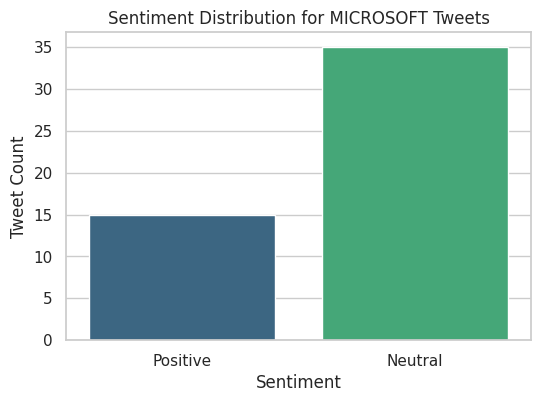

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {company_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


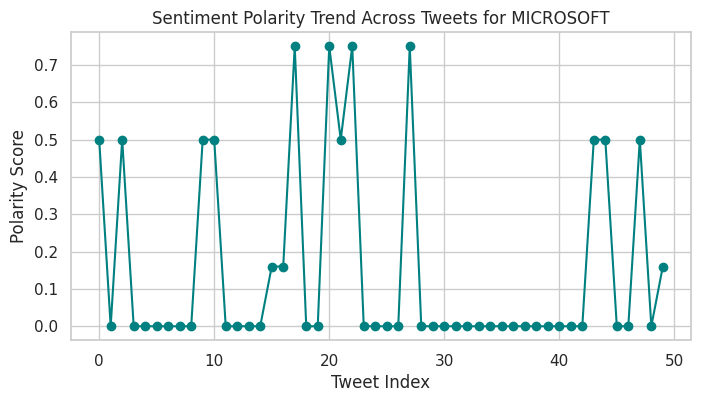

In [10]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {company_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


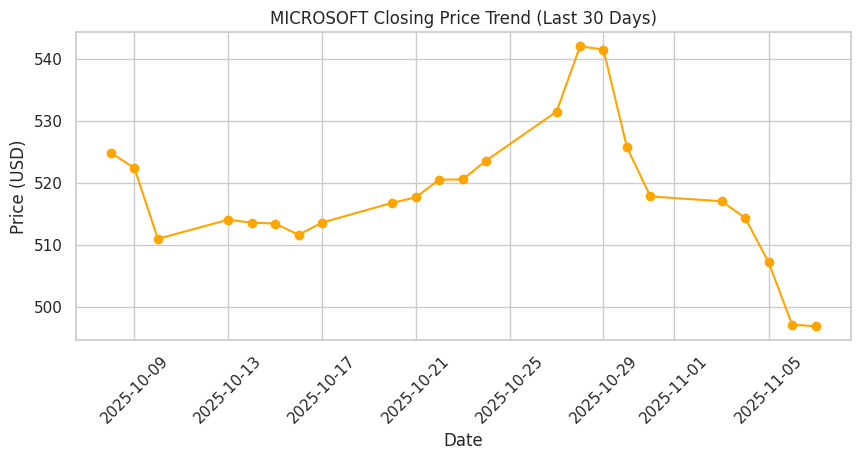

In [11]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{company_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using Alpha Vantage for Stock Data


First, install the library:

In [12]:
!pip install alpha_vantage

### Analyze Alpha Vantage Data
Here are some descriptive statistics for the Alpha Vantage data:

In [13]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
from google.colab import userdata

API_KEY = userdata.get('ALPHA_VANTAGE_API')
def detect_symbol(asset_name: str) -> str:
    """
    Maps common company/asset names to their typical stock or crypto symbols.
    If no match is found, the name itself is returned as the potential symbol.
    """
    mapping = {
    "BITCOIN": "BTCUSD",
    "BTC": "BTCUSD",

    "TESLA": "TSLA",
    "TSLA": "TSLA",

    "NETFLIX": "NFLX",
    "NFLX": "NFLX",

    "INFOSYS": "INFY",
    "INFY": "INFY",

    "TCS": "TCS",
    "TATA CONSULTANCY": "TCS",

    "RAKUTEN": "RKUNY",

    # ✅ Common U.S. tech
    "APPLE": "AAPL",
    "AAPL": "AAPL",

    "GOOGLE": "GOOG",
    "ALPHABET": "GOOG",
    "GOOG": "GOOG",

    "MICROSOFT": "MSFT",
    "MSFT": "MSFT",

    "AMAZON": "AMZN",
    "AMZN": "AMZN",

    "NVIDIA": "NVDA",
    "NVDA": "NVDA",

    "META": "META",
    "FACEBOOK": "META",

    # ✅ More popular tickers
    "AMD": "AMD",
    "INTEL": "INTC",
    "COCA COLA": "KO",
    "PEPSICO": "PEP",
    "WALMART": "WMT",

    # ✅ Indian stocks (BSE/NSE)
    "RELIANCE": "RELIANCE.BSE",
    "HDFC": "HDFC.BSE",
    "ICICI": "ICICIBANK.BSE",
    "WIPRO": "WIPRO.BSE",
    "HCL": "HCLTECH.BSE",

    # ✅ Crypto
    "ETHEREUM": "ETHUSD",
    "ETH": "ETHUSD",
    "DOGE": "DOGEUSD",
    "DOGECOIN": "DOGEUSD",
    "SOLANA": "SOLUSD",
    "SOL": "SOLUSD",
}

    # Return the mapped symbol or the original name (converted to uppercase for robustness)
    return mapping.get(asset_name.upper(), asset_name.upper())

    # --- Core Trend Analysis Logic ---
def get_trend(df: pd.DataFrame) -> tuple[str, str]:
    """
    Calculates 20-day and 50-day Simple Moving Averages (SMA) to determine
    the market trend (Bullish, Bearish, or Sideways).
    The '4. close' column is used for calculations.
    """
    df = df.copy()

    # Check for minimum data requirement for a reliable 50-day SMA
    if len(df) < 50:
        return "⚠️ Insufficient Data", "Cannot calculate trend (needs at least 50 days of data)"

    # Calculate SMAs
    # Note: rolling() automatically aligns the mean to the end of the window
    df['SMA20'] = df['4. close'].rolling(window=20).mean()
    df['SMA50'] = df['4. close'].rolling(window=50).mean()

    # Get the latest calculated values
    latest = df.iloc[-1]

    # Handle potential NaN values (occurs if the window is not yet full)
    if pd.isna(latest['SMA20']) or pd.isna(latest['SMA50']):
         return "⚠️ Data Not Yet Complete", "Need more data points for rolling average calculation"

    # Compare SMAs (Golden Cross / Death Cross strategy)
    if latest['SMA20'] > latest['SMA50']:
        return "✅ Bullish Trend", "The short-term trend (SMA20) is above the long-term trend (SMA50). Potential Uptrend."
    elif latest['SMA20'] < latest['SMA50']:
        return "❌ Bearish Trend", "The short-term trend (SMA20) is below the long-term trend (SMA50). Potential Downtrend."
    else:
        return "↔️ Sideways Market", "SMAs are crossing or are too close. Neutral — Wait for a breakout."

# --- Main Execution Block ---
def run_analysis():
    """
    Main function to ask for user input, fetch data, and print the analysis.
    """
    if not API_KEY:
        print("\n❌ Error: ALPHA_VANTAGE_API_KEY is not configured.")
        print("Please set the 'ALPHA_VANTAGE_API_KEY' secret in your environment.")
        return

    # --- ASK USER ---
    try:
        # company_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
        company_name=asset_name
    except EOFError:
        # Handle non-interactive environments by using a default
        company_name = "TESLA"
        print(f"Non-interactive environment detected. Using default company: {company_name}")


    if not company_name:
        print("Analysis cancelled: Company name cannot be empty.")
        return

    print(f"\nData analysis will be performed for: {company_name}")

    # --- SYMBOL DETECTION ---
    global symbol
    symbol = detect_symbol(company_name)
    print(f"Using symbol: {symbol}")

    # --- FETCH & PROCESS ---
    try:
        # Initialize the TimeSeries client
        # output_format='pandas' is essential for DataFrame operations
        ts = TimeSeries(key=API_KEY, output_format='pandas')
        global data
        # Fetch daily data (compact size fetches 100 data points, good for 50-day SMA)
        data, meta = ts.get_daily(symbol=symbol, outputsize='compact')
        # Alpha Vantage returns data newest-first, so sort the index (date) oldest-first
        data = data.sort_index()
        # print(data)

        print(f"\n📊 Latest Market Data for {company_name} ({symbol}):")
        # Display the last 3 days of data for review
        print(data[['4. close']].tail(3).to_markdown(numalign="left", stralign="left"))

        # Perform the trend analysis
        trend, decision = get_trend(data)

        # Output the results
        print("\n--- Analysis Result ---")
        print(f"Asset: {company_name} ({symbol})")
        print(f"📌 Trend Status: {trend}")
        print(f"🧾 Decision: {decision}")
        print("-----------------------")

    except ValueError as ve:
        # Alpha Vantage throws ValueError on invalid symbol or API key issues
        print(f"\n❌ Error fetching data for {company_name} ({symbol}):")
        print(f"    Details: {ve}")
        print("    Suggestion: Check if the symbol is correct and if the API key is valid.")

    except Exception as e:
        print(f"\n❌ An unexpected error occurred: {e}")

if __name__ == "__main__":
    run_analysis()


Data analysis will be performed for: MICROSOFT
Using symbol: MSFT

📊 Latest Market Data for MICROSOFT (MSFT):
| date                | 4. close   |
|:--------------------|:-----------|
| 2025-11-05 00:00:00 | 507.16     |
| 2025-11-06 00:00:00 | 497.1      |
| 2025-11-07 00:00:00 | 496.82     |

--- Analysis Result ---
Asset: MICROSOFT (MSFT)
📌 Trend Status: ✅ Bullish Trend
🧾 Decision: The short-term trend (SMA20) is above the long-term trend (SMA50). Potential Uptrend.
-----------------------


Now, let's visualize the closing price over time:



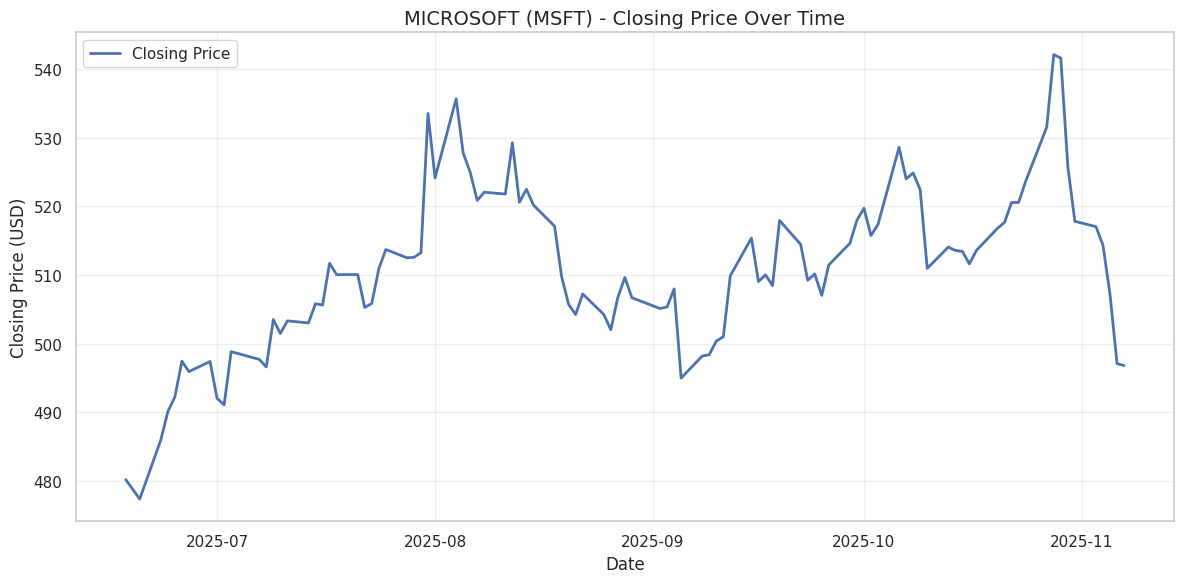

In [14]:
# Ensure data exists
if 'data' in locals() and not data.empty:
  plt.figure(figsize=(12,6))
  plt.plot(data.index, data['4. close'], label='Closing Price', linewidth=2)

  plt.title(f"{company_name} ({symbol}) - Closing Price Over Time", fontsize=14)
  plt.xlabel("Date", fontsize=12)
  plt.ylabel("Closing Price (USD)", fontsize=12)
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")

In [15]:
import plotly.graph_objects as go
# Ensure data is available
if 'data' in locals() and not data.empty:
    fig = go.Figure(data=[
        go.Candlestick(
            x=data.index,
            open=data['1. open'],
            high=data['2. high'],
            low=data['3. low'],
            close=data['4. close'],
            name=f"{company_name}"
        )
    ])

    fig.update_layout(
        title=f"{company_name} ({symbol}) - Candlestick Chart",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        xaxis_rangeslider_visible=False,
        template="plotly_white",
        width=950,
        height=550
    )

    fig.show()
else:
    print("No data available to visualize. Please run the data fetch cell first.")


# Sprint 1 Conclusion
**What we achieved in Sprint 1:**

1. Collected real-time open-source data from:


* Wikipedia (summary)
* Yahoo Finance (market prices)
* Google News RSS (recent headlines)
* Generated synthetic tweets (50) for sentiment analysis

2. Cleaned and structured data using **pandas DataFrames**
3. Performed sentiment analysis using **TextBlob**

4. Visualized key insights:
* Sentiment distribution (bar chart)
* Sentiment trend across tweets (line chart)
* Market price trend (line chart)

5. Built a flexible, interactive notebook for any asset/company input

This notebook sets the foundation for Sprint 2, where we will integrate real-time dashboards and AI-driven analytics.